In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')



## Графики (matplotlib)

plot, text + настройки стилей линий, параметров осей

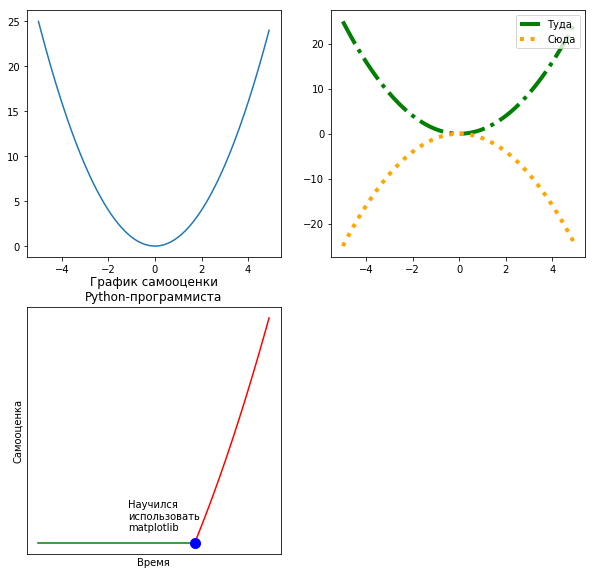

In [28]:
plt.figure(figsize=(10, 10))


plt.subplot(2,2,1)
x = np.arange(-5, 5, 0.1)
y = x**2
plt.plot(x, y)


plt.subplot(2,2,2)
plt.plot(x, y, linewidth=4, color='g', linestyle='-.', label='Туда') # '-', '--', '-.', ':' 
plt.plot(x, -y, linewidth=4, color='orange', linestyle=':', label='Сюда')
plt.legend(loc='upper right')


plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.title('График самооценки\nPython-программиста')
plt.xlabel('Время')
plt.ylabel('Самооценка')
x = np.arange(0, 4, 0.1)
y = np.zeros_like(x)
plt.plot(x, y , 'g')
x = np.arange(4, 6, 0.1)
y = x**2 - 16
plt.plot(x, y , 'r')
plt.plot([4], [0], 'b.', markersize=20.0)
plt.text(2.3, 1, 'Научился\nиспользовать\nmatplotlib');
#plt.grid()

## Работа с графиками (matplotlib, seaborn, plotly) + Pandas

В качестве примера визуализации реальных (на самом деле синтетических) данных воспользуемся данными о ценах домов из датасета <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data'>House Prices: Advanced Regression Techniques</a>

In [3]:
df = pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns', 100)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

Построим график зависимости цены дома от его площади. Сначала отсортируем датафрейм по цене домов

In [9]:
df_sort_by_price = df.sort_values(by='LotArea')
df_sort_by_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,TwnhsE,2Story,6,6,1980,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,285,Unf,0,276,561,GasA,TA,Y,SBrkr,561,668,0,1229,0,0,1,1,2,1,TA,5,Typ,1,TA,Attchd,1980.0,Fin,2,462,TA,TA,Y,150,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
1039,1040,180,RM,21.0,1477,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,509,Unf,0,121,630,GasA,TA,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,Attchd,1970.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000
614,615,180,RM,21.0,1491,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,150,GLQ,480,0,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,96,24,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,75500
489,490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,8,1970,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,515,Unf,0,115,630,GasA,TA,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,1970.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


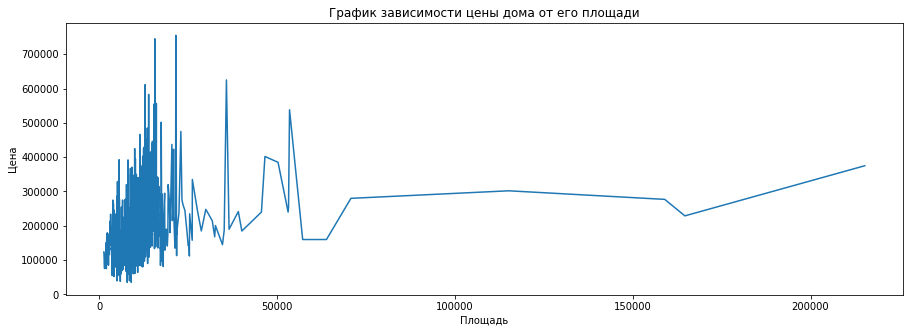

In [7]:
plt.figure(figsize=(15,5))
plt.title('График зависимости цены дома от его площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.plot(df_sort_by_price['LotArea'], df_sort_by_price['SalePrice']);

Другой способ построения графика можно использовать встроенные возможности Jupyter

Populating the interactive namespace from numpy and matplotlib


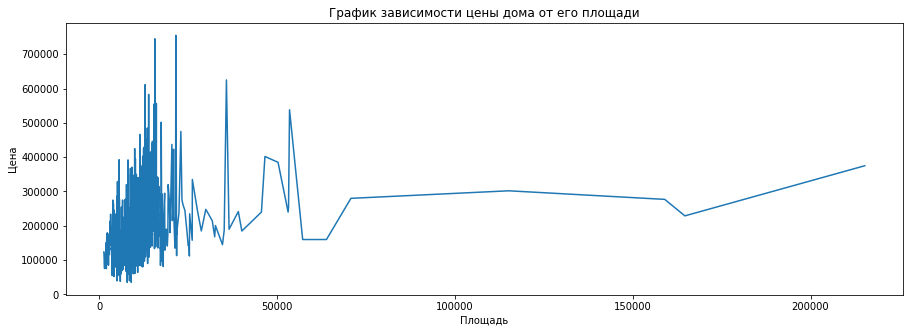

In [31]:
%pylab inline
figure(figsize=(15,5))
title('График зависимости цены дома от его площади')
xlabel('Площадь')
ylabel('Цена')
plot(df_sort_by_price['LotArea'], df_sort_by_price['SalePrice']);

Или через сам Pandas

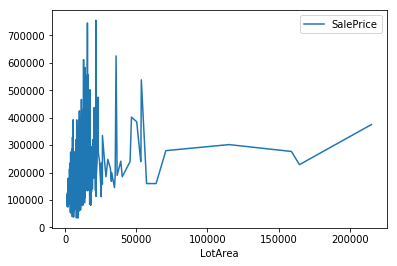

In [12]:
df_sort_by_price.plot(x='LotArea', y='SalePrice');

Здесь будут полезны интерактивные графики Plotly

In [9]:
price_on_area = go.Scatter(
    x = df_sort_by_price.LotArea,
    y = df_sort_by_price.SalePrice,
    mode = 'lines'
)

In [11]:
layout = go.Layout(
                    title='График зависимости цены дома от его площади',
                    xaxis=dict(title='Площадь'),
                    yaxis=dict(title='Цена')
)

fig = go.Figure(data = [price_on_area], layout = layout)
iplot(fig)

И наконец Seaborn 

~~но есть ли смысл?~~

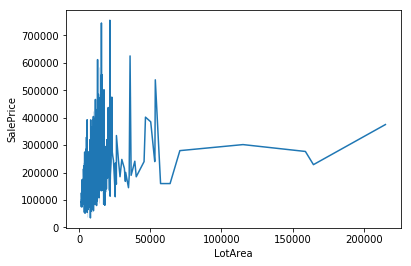

In [15]:
sns.lineplot(x="LotArea", y="SalePrice", data=df_sort_by_price);

## Просто красивые примеры для демонстрации возможностей Matplotlib (только 2D)

https://matplotlib.org/gallery/showcase/integral.html#sphx-glr-gallery-showcase-integral-py

[]

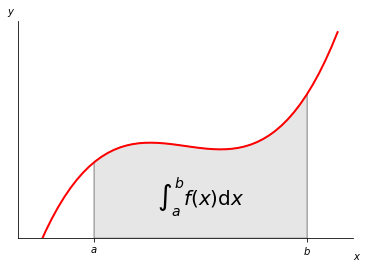

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([]);


Text(0, 0.5, 'volts (mV)')

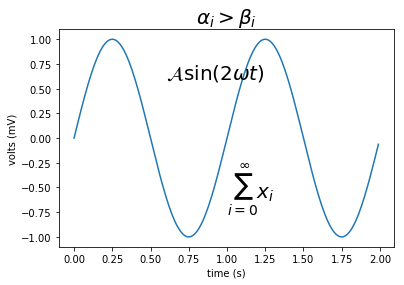

In [4]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)');

([], <a list of 0 Text yticklabel objects>)

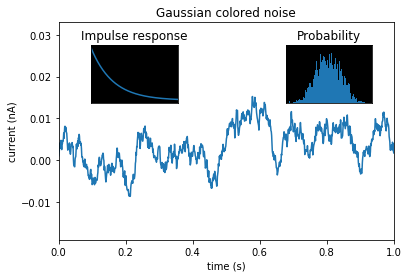

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1 * np.min(s), 2 * np.max(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='k')
n, bins, patches = plt.hist(s, 400, density=True)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='k')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([]);